# Minimisation d'une fonction à 2 variables

###  ***Enoncé***  

En exploitant l'algorithme de **descente de gradient**, déterminer sur la plage : 

$$\boldsymbol{\left(\begin{array}{cc} \theta_1 & \theta_2 \end{array}\right)^T \in [\,-3\,,\,3\,]\times[\,-3\,,\,3\,]}$$

le minimum de la fonction *(représentée ci-dessous)* :

$$ \boldsymbol{J(\Theta) = \theta_1\,e^{-\theta_1^{\,2}-\theta_2^{\,2}}+\frac{1}{20}(\theta_1^{\,2}+\theta_2^{\,2})}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def cout(Theta):
    JTheta = Theta[0]*np.exp(-Theta[0]**2-Theta[1]**2)+(Theta[0]**2+Theta[1]**2)/20
    return JTheta

In [3]:
Theta1_trace = np.linspace(-3,3,61)
Theta2_trace = np.linspace(-3,3,61)
Theta1_trace , Theta2_trace = np.meshgrid(Theta1_trace,Theta2_trace)
JTheta_trace = np.zeros((len(Theta1_trace),len(Theta2_trace)))
for j in range(len(Theta1_trace)):
    for k in range(len(Theta2_trace)):
        JTheta_trace[j,k] = cout(np.array([Theta1_trace[j,k] , Theta2_trace[j,k]]))

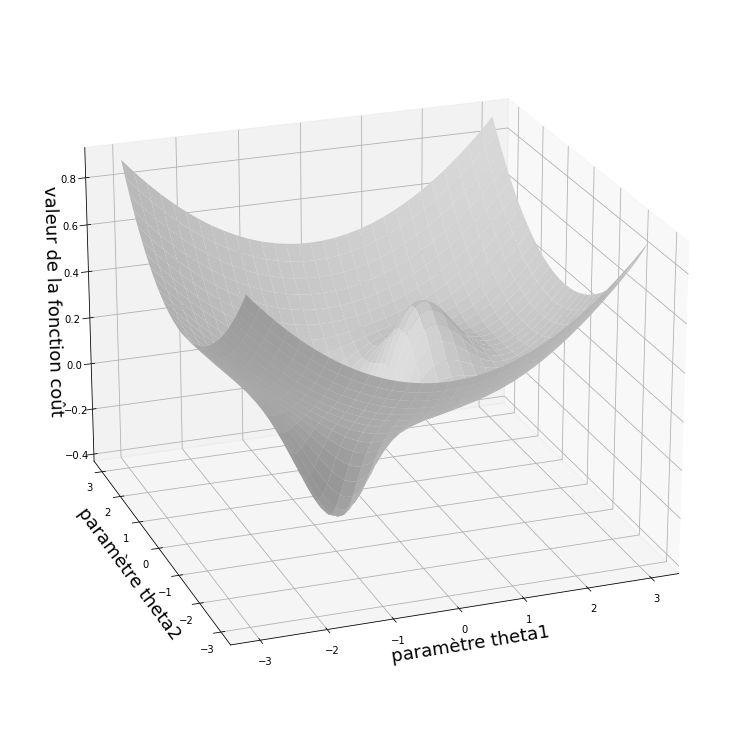

In [4]:
fig = plt.figure()
fig.set_size_inches(10,10, forward=True)
ax = Axes3D(fig, azim=-110, elev=22)
ax.plot_surface(Theta1_trace,Theta2_trace,JTheta_trace,color='whitesmoke')
ax.set_xlabel('paramètre theta1', fontsize=18)
ax.set_ylabel('paramètre theta2', fontsize=18)
ax.set_zlabel('valeur de la fonction coût', fontsize=18)
plt.show()

Encore une fois, pour pouvoir comparer facilement différentes initialisations / paramétrisations de l'algorithme, il est demandé de programmer la descente de gradient au sein d'une fonction `DG2` présentant 5 paramètres d'entrée :
* **Theta0** : valeur initiale du vecteur de paramètres *(défini comme un np.array)* pour lancer l'algorithme
* **lrate** : gain du gradient *(learning rate)*
* **tolerance** : variation du coût pour arrêter les itérations
* **Nbmax** : nombre d'itérations maximales
* **duree** : durée (en seconde) entre 2 itérations sur les graphiques *( duree = 0 pour tout tracer en bloc)*

In [6]:
# Comme dans le cas précédent, il faut commencer par créer une fonction :
# -> qui prend en paramètre d'entrée la valeur du vecteur Theta
# -> et qui retourne la valeur du gradient de la fonction coût pour cette valeur de Theta

In [ ]:
%matplotlib

Avant d'écrire le programme pour la descente de gradient, on peut déjà s'assurer que les gradients calculés par la fonction ci-dessus donnent bien **la ligne de plus grande pente** *(donc la direction selon laquelle le coût varie le plus vite)*

In [7]:
Theta1g_trace = np.linspace(-3,3,31)
Theta2g_trace = np.linspace(-3,3,31)
Theta1g_trace , Theta2g_trace = np.meshgrid(Theta1g_trace,Theta2g_trace)
GTheta0_trace = np.zeros((len(Theta1g_trace),len(Theta2g_trace)))
GTheta1_trace = np.zeros((len(Theta1g_trace),len(Theta2g_trace)))
for j in range(len(Theta1g_trace)):
    for k in range(len(Theta2g_trace)):
        GTheta0_trace[j,k] = gradient(np.array([Theta1g_trace[j,k] , Theta2g_trace[j,k]]))[0]
        GTheta1_trace[j,k] = gradient(np.array([Theta1g_trace[j,k] , Theta2g_trace[j,k]]))[1]

fig = plt.figure()
fig.set_size_inches(10,10, forward=True)
ax = Axes3D(fig, azim=-110, elev=22)
ax.plot_surface(Theta1_trace,Theta2_trace,JTheta_trace,color='whitesmoke')
ax.quiver(Theta1g_trace, Theta2g_trace, -1, -GTheta0_trace, -GTheta1_trace, 0, length=0.15, normalize=True, color='#333333')

ax.set_xlabel('paramètre theta1', fontsize=18)
ax.set_ylabel('paramètre theta2', fontsize=18)
ax.set_zlabel('valeur de la fonction coût', fontsize=18)
plt.show()

On est encore une fois dans le cas où **le gradient pouvait être calculé analytiquement**, ce qui est avantageux en termes de coût calculatoire.  
Après, il est bien sûr toujours possible d'utiliser **un gradient numérique**

In [8]:
# Reprogrammer la fonction gradient, en utilisant cette fois un gradient numérique

In [9]:
Theta1g_trace = np.linspace(-3,3,31)
Theta2g_trace = np.linspace(-3,3,31)
Theta1g_trace , Theta2g_trace = np.meshgrid(Theta1g_trace,Theta2g_trace)
GTheta0_trace = np.zeros((len(Theta1g_trace),len(Theta2g_trace)))
GTheta1_trace = np.zeros((len(Theta1g_trace),len(Theta2g_trace)))
for j in range(len(Theta1g_trace)):
    for k in range(len(Theta2g_trace)):
        GTheta0_trace[j,k] = gradient(np.array([Theta1g_trace[j,k] , Theta2g_trace[j,k]]))[0]
        GTheta1_trace[j,k] = gradient(np.array([Theta1g_trace[j,k] , Theta2g_trace[j,k]]))[1]

fig = plt.figure()
fig.set_size_inches(10,10, forward=True)
ax = Axes3D(fig, azim=-110, elev=22)
ax.plot_surface(Theta1_trace,Theta2_trace,JTheta_trace,color='whitesmoke')
ax.quiver(Theta1g_trace, Theta2g_trace, -1, -GTheta0_trace, -GTheta1_trace, 0, length=0.15, normalize=True, color='#333333')

ax.set_xlabel('paramètre theta1', fontsize=18)
ax.set_ylabel('paramètre theta2', fontsize=18)
ax.set_zlabel('valeur de la fonction coût', fontsize=18)
plt.show()

Pour la suite, **on revient au gradient analytique**, puisqu'il est disponible

In [10]:
# Reprogrammer ici la fonction qui retourne le gradient via son expression analytique

In [25]:
def DG2(Theta0,lrate,tolerance,Nbmax,duree):    
    
    Theta = np.zeros((2,Nbmax+1))
    # -> programmer l'algorithme de descente de gradient
    # Les valeurs des paramètres Theta au fil des itérations sont à ranger dans le vecteur Theta
    # Et le nombre d'itérations jusqu'à la convergence de l'algorithme sera noté i+1
    
    print('Le nombre d\'itération est :',i+1)
    print('Le minimum de la fonction est atteint pour theta = [ {:.4f} , {:.4f} ]'
          .format(Theta[0,-1],Theta[1,-1]))
    print('Le minimum de la fonction est J(theta) = {:.4f}'.format(cout(Theta[:,-1])))
    
    fig = plt.figure(1)
    plt.clf()
    fig.set_size_inches(8,8, forward=True)
    ax = Axes3D(fig, azim=-110, elev=22)
    ax.plot_wireframe(Theta1_trace,Theta2_trace,JTheta_trace)
    ax.set_xlabel('paramètre theta1', fontsize=18)
    ax.set_ylabel('paramètre theta2', fontsize=18)
    ax.set_zlabel('valeur de la fonction coût', fontsize=18)
    
    plt.figure(2,figsize=(8,8))
    plt.clf()
    plt.xlim(-1, i+1)
    plt.ylim(np.min(Theta)-0.1,np.max(Theta)+0.1)
    plt.grid()
    plt.scatter(0, Theta[0,0], c = 'b', label = 'Theta1')
    plt.scatter(0, Theta[1,0], c = 'c', label = 'Theta2')
    plt.legend()
    
    if duree != 0:
        for j in range(i+2):
            plt.figure(1)
            ax.scatter(Theta[0,j],Theta[1,j],cout(Theta[:,j]),c='r',s=40)
            plt.pause(duree)
            plt.figure(2)
            plt.scatter(j,Theta[0,j], c = 'b')
            plt.scatter(j,Theta[1,j], c = 'c')
            plt.pause(duree)
    else:
        plt.figure(1)
        ax.scatter(Theta[0,:],Theta[1,:],cout(Theta),c='r',s=40)
        plt.figure(2)
        plt.scatter(np.linspace(0,i+1,i+2), Theta[0,:], c = 'b')
        plt.scatter(np.linspace(0,i+1,i+2), Theta[1,:], c = 'c')
    
    plt.show()

Lorsqu'on initialise l'algorithme depuis ***un jeu de paramètres initiaux qui sont directement dans le bassin d'attraction du minimum global***, les itérations successives font **"dévaler" la pente** aux paramètres qui convergent vite vers les valeurs optimales  

In [ ]:
DG2(np.array([-2,-2]),0.2,1e-4,100,0)

Par contre, lorsqu'***une zone de gradient faible*** est rencontrée pendant la descente de gradient *($\Leftrightarrow$ absence de pente)*, **la convergence peut se bloquer**.

In [ ]:
DG2(np.array([2.4,-0.2]),0.2,1e-4,100,0)

En contraignant l'algorithme à poursuivre les itérations *(en baissant pour cela* ***la tolérance*** *)*, on peut récupérer la convergence des paramètres, mais **elle sera très très longue** *(ne pas utiliser l'animation graphique, car dans ce cas elle est très longue)*

In [ ]:
DG2(np.array([2.4,-0.2]),0.2,1e-6,1000,0)

Pour se sortir ***des zones de gradient faible***, il faut donner de **l'inertie** à la descente de gradient

Programmer une descente de gradient avec inertie au sein d'une fonction `DG2i` présentant 6 paramètres d'entrée :
* **Theta0** : valeur initiale du vecteur de paramètres *(défini comme un np.array)* pour lancer l'algorithme
* **lrate** : gain du gradient *(learning rate)*
* **rateI** : gain de l'inertie
* **tolerance** : variation du coût pour arrêter les itérations
* **Nbmax** : nombre d'itérations maximales
* **duree** : durée (en seconde) entre 2 itérations sur les graphiques *( duree = 0 pour tout tracer en bloc)*

In [23]:
def DG2i(Theta0,lrate,rateI,tolerance,Nbmax,duree):
    
    Theta = np.zeros((2,Nbmax+1))

    # -> programmer l'algorithme de descente de gradient avec inerie
    # Les valeurs des paramètres Theta au fil des itérations sont à ranger dans le vecteur Theta
    # Et le nombre d'itérations jusqu'à la convergence de l'algorithme sera noté i+1
    
    print('Le nombre d\'itération est :',i+1)
    print('Le minimum de la fonction est atteint pour theta = [ {:.4f} , {:.4f} ]'
          .format(Theta[0,-1],Theta[1,-1]))
    print('Le minimum de la fonction est J(theta) = {:.4f}'.format(cout(Theta[:,-1])))
    
    fig = plt.figure(1)
    plt.clf()
    fig.set_size_inches(8,8, forward=True)
    ax = Axes3D(fig, azim=-110, elev=22)
    ax.plot_wireframe(Theta1_trace,Theta2_trace,JTheta_trace)
    ax.set_xlabel('paramètre theta1', fontsize=18)
    ax.set_ylabel('paramètre theta2', fontsize=18)
    ax.set_zlabel('valeur de la fonction coût', fontsize=18)
    
    plt.figure(2,figsize=(8,8))
    plt.clf()
    plt.xlim(-1, i+1)
    plt.ylim(np.min(Theta)-0.1,np.max(Theta)+0.1)
    plt.grid()
    plt.scatter(0, Theta[0,0], c = 'b', label = 'Theta1')
    plt.scatter(0, Theta[1,0], c = 'c', label = 'Theta2')
    plt.legend()
    
    if duree != 0:
        for j in range(i+2):
            plt.figure(1)
            ax.scatter(Theta[0,j],Theta[1,j],cout(Theta[:,j]),c='r',s=40)
            plt.pause(duree)
            plt.figure(2)
            plt.scatter(j,Theta[0,j], c = 'b')
            plt.scatter(j,Theta[1,j], c = 'c')
            plt.pause(duree)
    else:
        plt.figure(1)
        ax.scatter(Theta[0,:],Theta[1,:],cout(Theta),c='r',s=40)
        plt.figure(2)
        plt.scatter(np.linspace(0,i+1,i+2), Theta[0,:], c = 'b')
        plt.scatter(np.linspace(0,i+1,i+2), Theta[1,:], c = 'c')
    
    plt.show()

In [ ]:
DG2i(np.array([2.4,-0.2]),0.2,0.7,1e-6,1000,0)

En donnant **un peu plus d'inertie**, la convergence est ***plus rapide***, au prix ***d'oscillations plus importantes***

In [ ]:
DG2i(np.array([2.4,-0.2]),0.2,0.9,1e-6,1000,0)